<a href="https://colab.research.google.com/github/nikhilans/CHDRisk-Classification/blob/main/CH_Nikhila_N_S_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning - Capstone Project 1 - Cardiovascular Risk Prediction**

### **Problem Statement** <br>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. <br>

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

### **Data Description**

#### **Demographic:**
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### **Behavioral:**
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### **Medical( history):**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

#### **Medical(current):**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

#### **Predict variable (desired target):**
**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

### Load the data

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 4: Machine Learning/Capstone Projects/Cardiovascular Risk Prediction - Nikhila N S/data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# check missing-values

df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* We have missing values in Education, cigPerDay, BPMeds, totChol, BMI, heartRate and glucose
* We will analyse these further in the later sections to check how to handle these missing values.

In [ ]:
# list of features in data

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# creating list for numeric and categorical features
# id is a unique identifier; not considering

num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cat_cols = ['education', 'sex','is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
# quick look at numeric features
df[num_cols].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3368.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000
mean,49.542183,9.069477,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520
std,8.592878,11.879078,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753
min,32.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [ ]:
# quick look at categorical columns

df[cat_cols].describe(include = 'all')

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,3303.000000,3390,3390,3346.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NO,NaN,NaN,NaN,NaN,NaN
freq,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN
mean,1.970936,NaN,NaN,0.029886,0.006490,0.315339,0.025664,0.150737
std,1.019081,NaN,NaN,0.170299,0.080309,0.464719,0.158153,0.357846
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
# check duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


We have no duplicate records

### Exploratory Data Analysis

#### Univariate Analysis

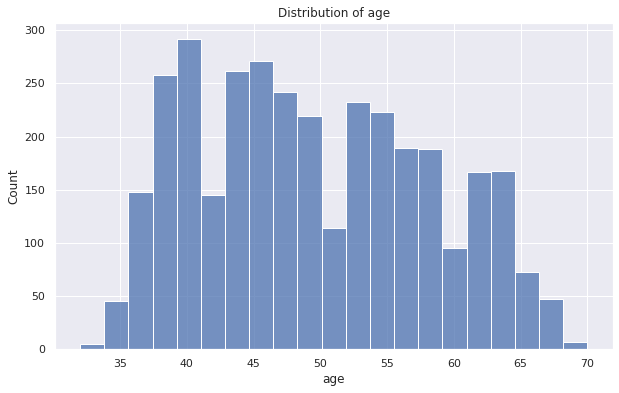

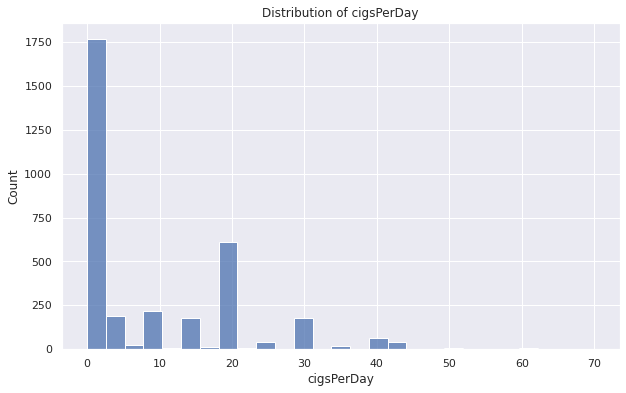

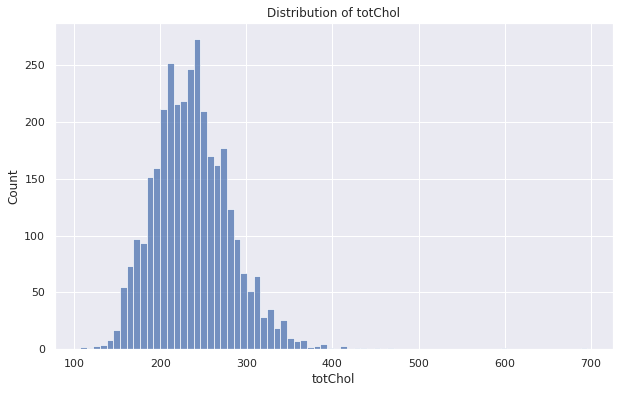

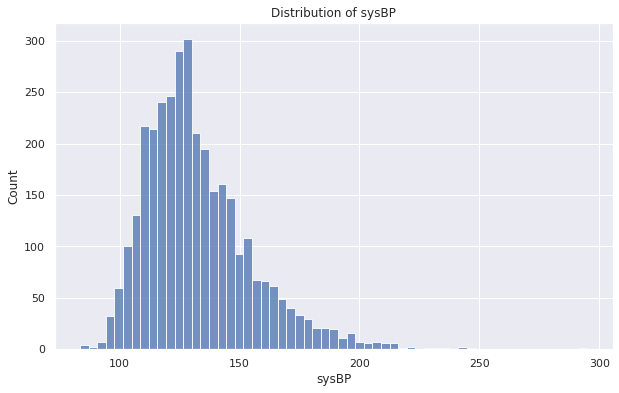

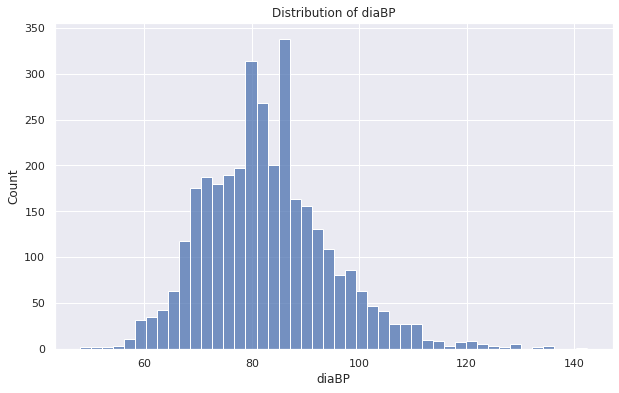

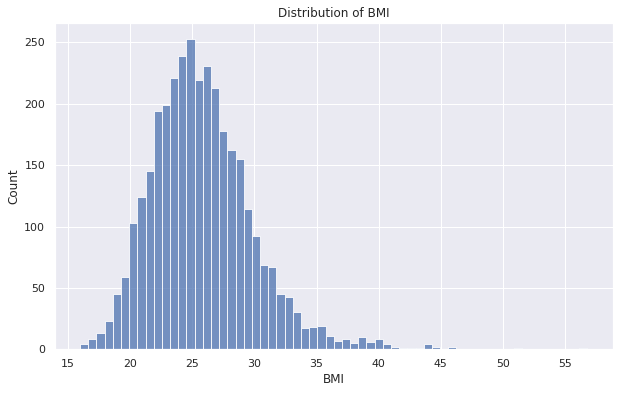

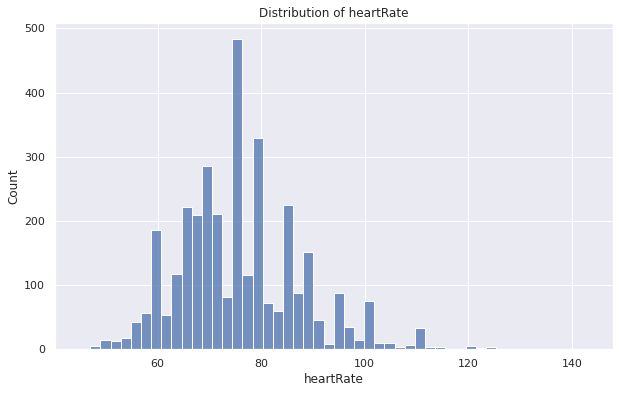

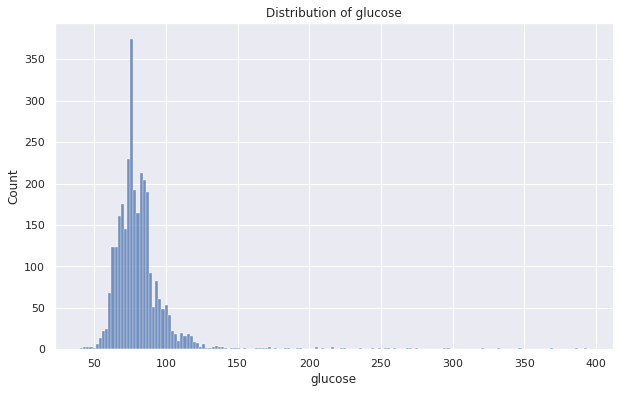

In [ ]:
# visualize the distributions for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

We can see some skewness in the data

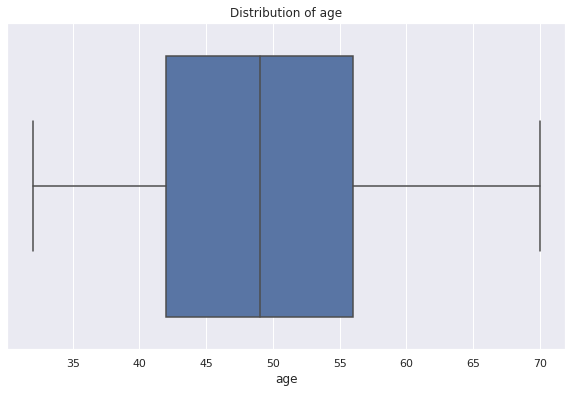

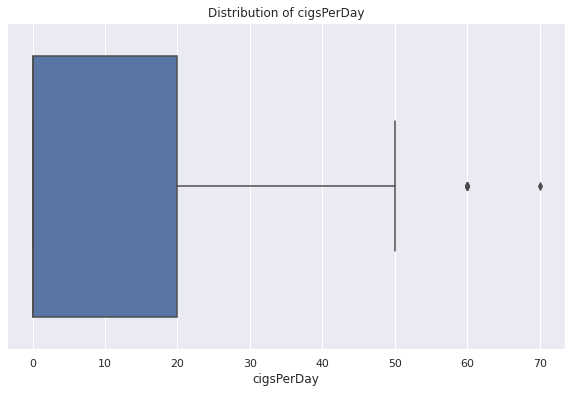

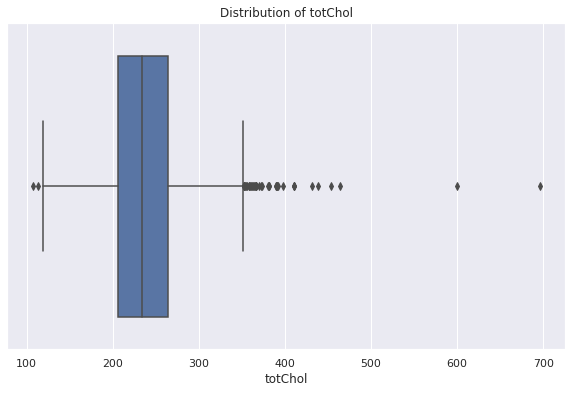

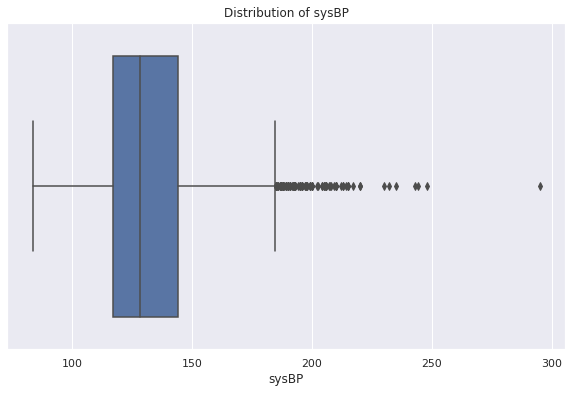

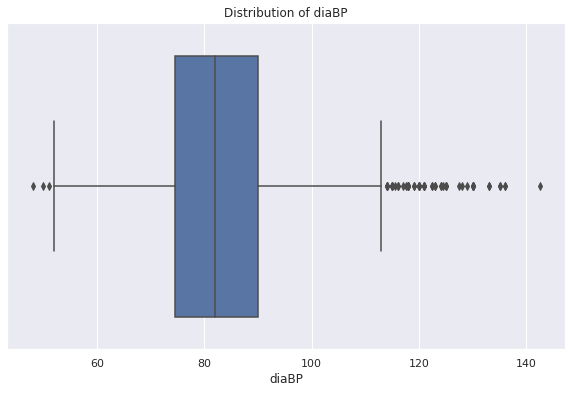

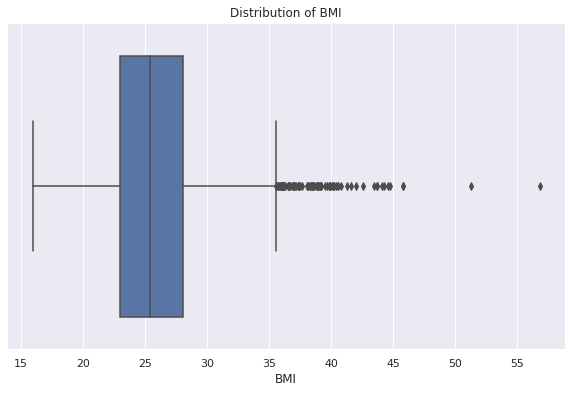

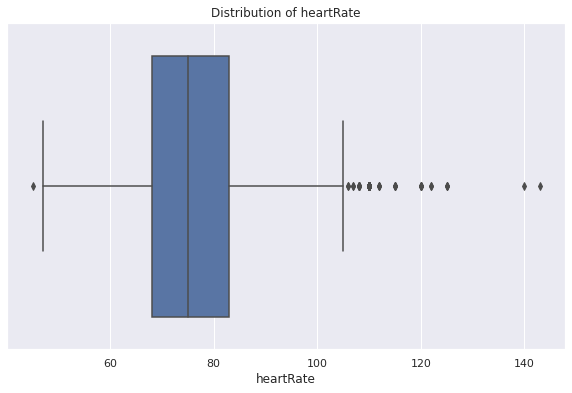

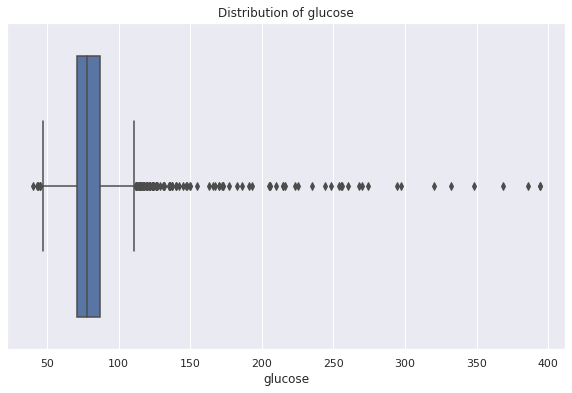

In [ ]:
# Box plot for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.boxplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

* We can see some outliers
* Check if these are outliers or noise? Explore the actual range of these features


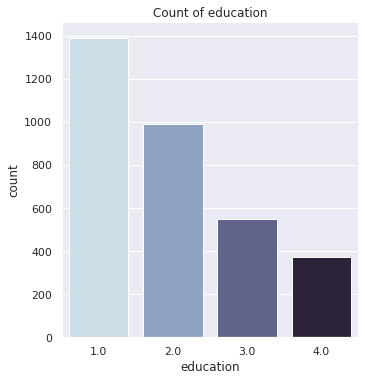

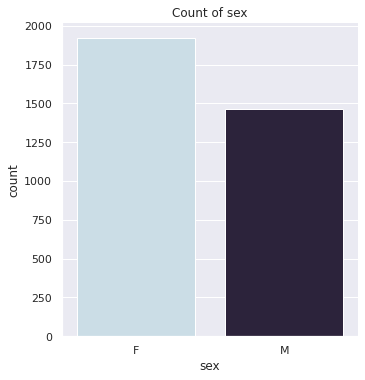

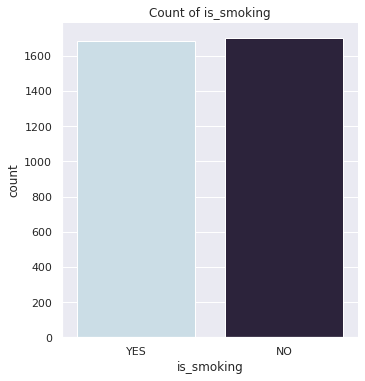

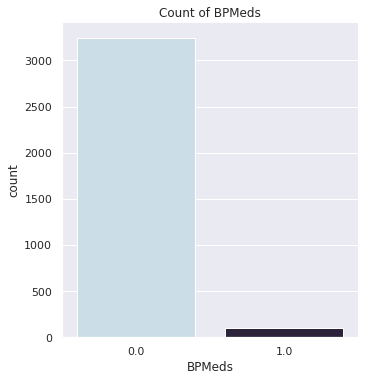

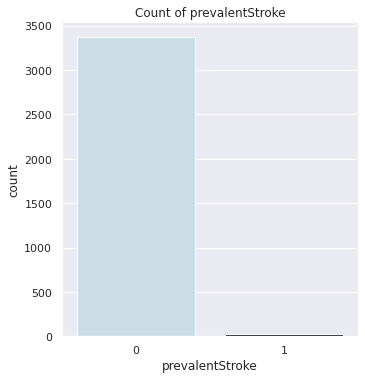

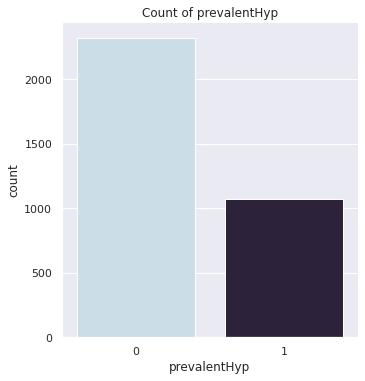

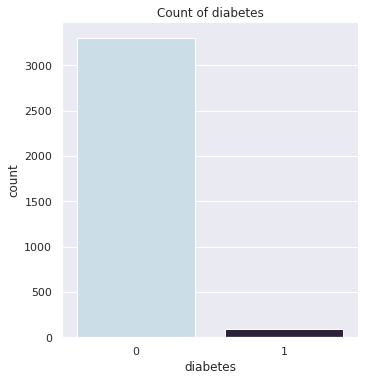

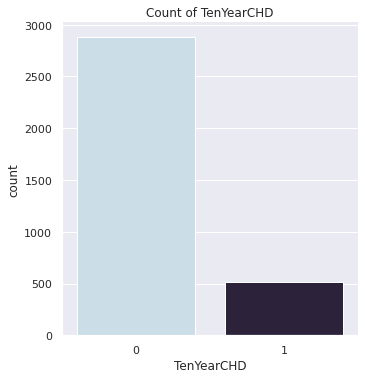

In [ ]:
# Categorical Features

for i, ii in enumerate(cat_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, kind='count', palette="ch:s=.25,rot=-.25")
  plt.title(f'Count of {ii}')
  plt.show()

* We have an imbalanced dataset
* We will have to handle this before modelling

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

#### Bivariate Analysis



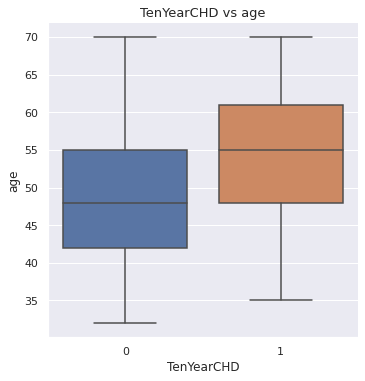

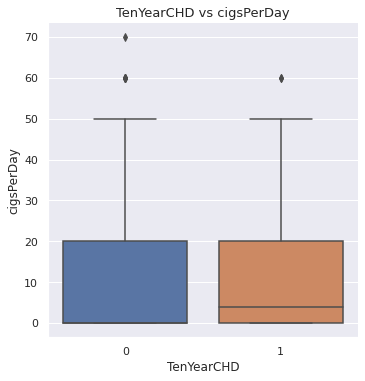

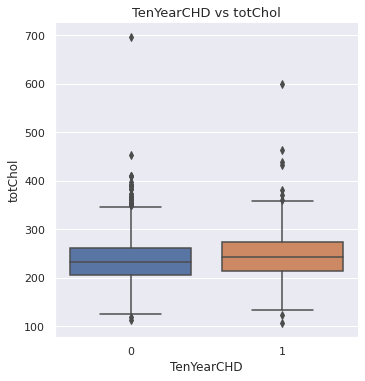

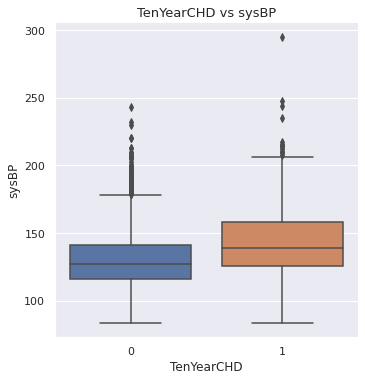

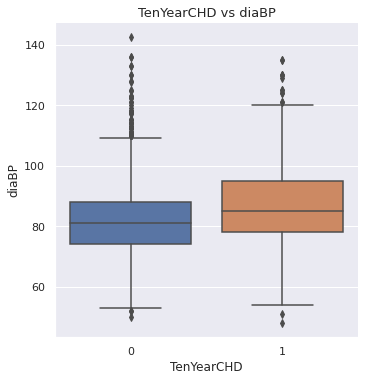

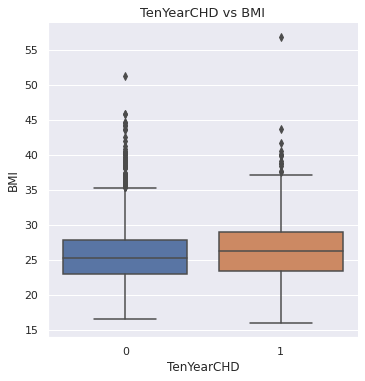

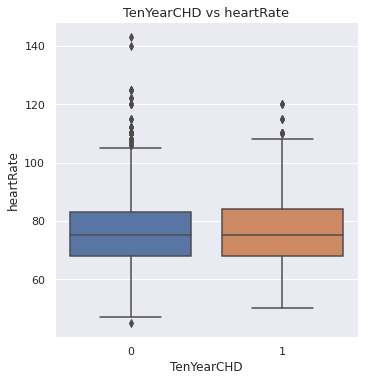

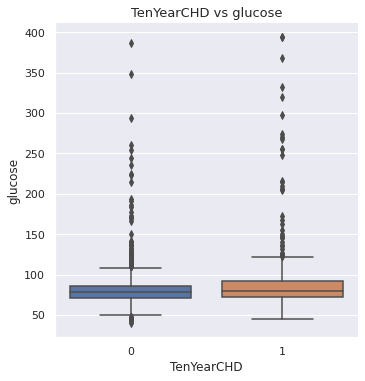

In [ ]:
# Dependent Variable vs numeric features
for i, ii in enumerate(num_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

* We can see that the mean age of people who have a 10-year risk of CHD is higher than those without the risk.
* The average sysBP and diaBP is also higher for those who are classified as having risk of CHD

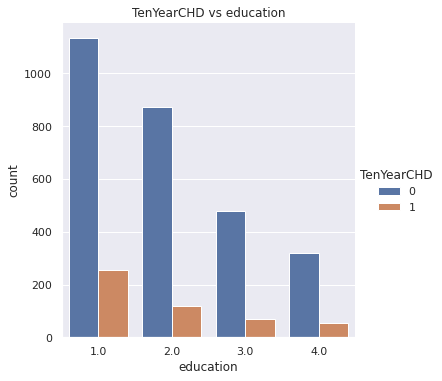

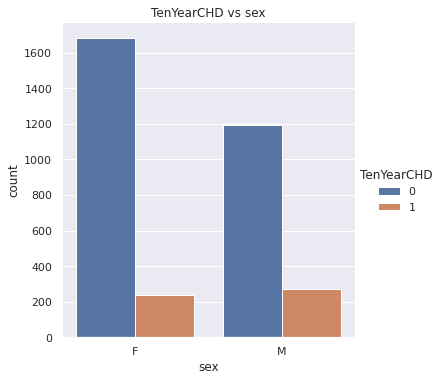

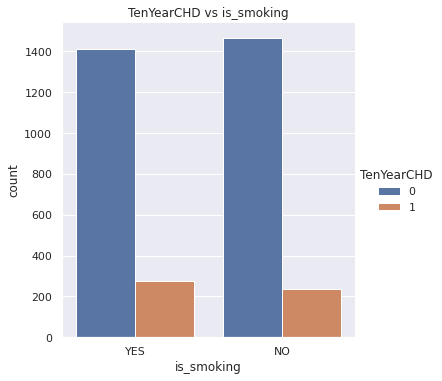

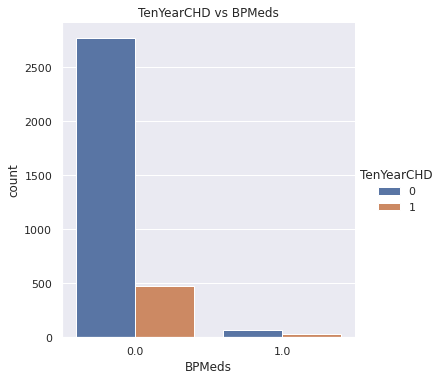

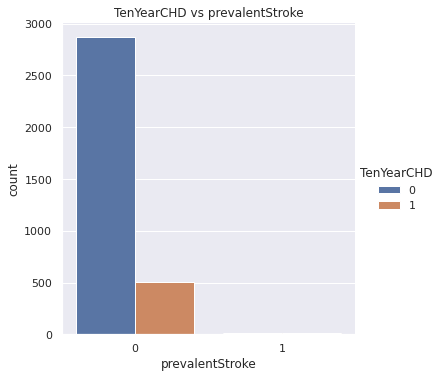

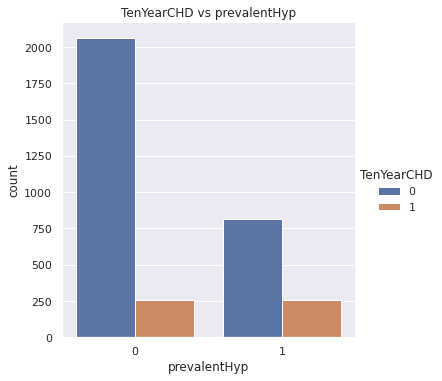

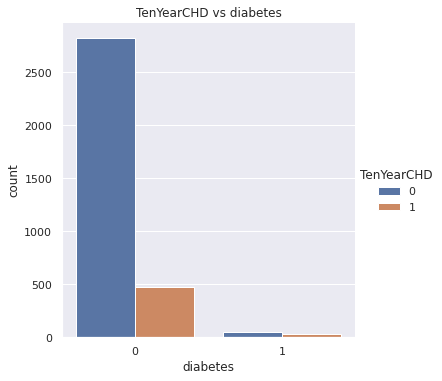

In [ ]:
# Dependent variable vs categorical features

for i, ii in enumerate(cat_cols[:-1]):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, hue=cat_cols[-1], kind='count')
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

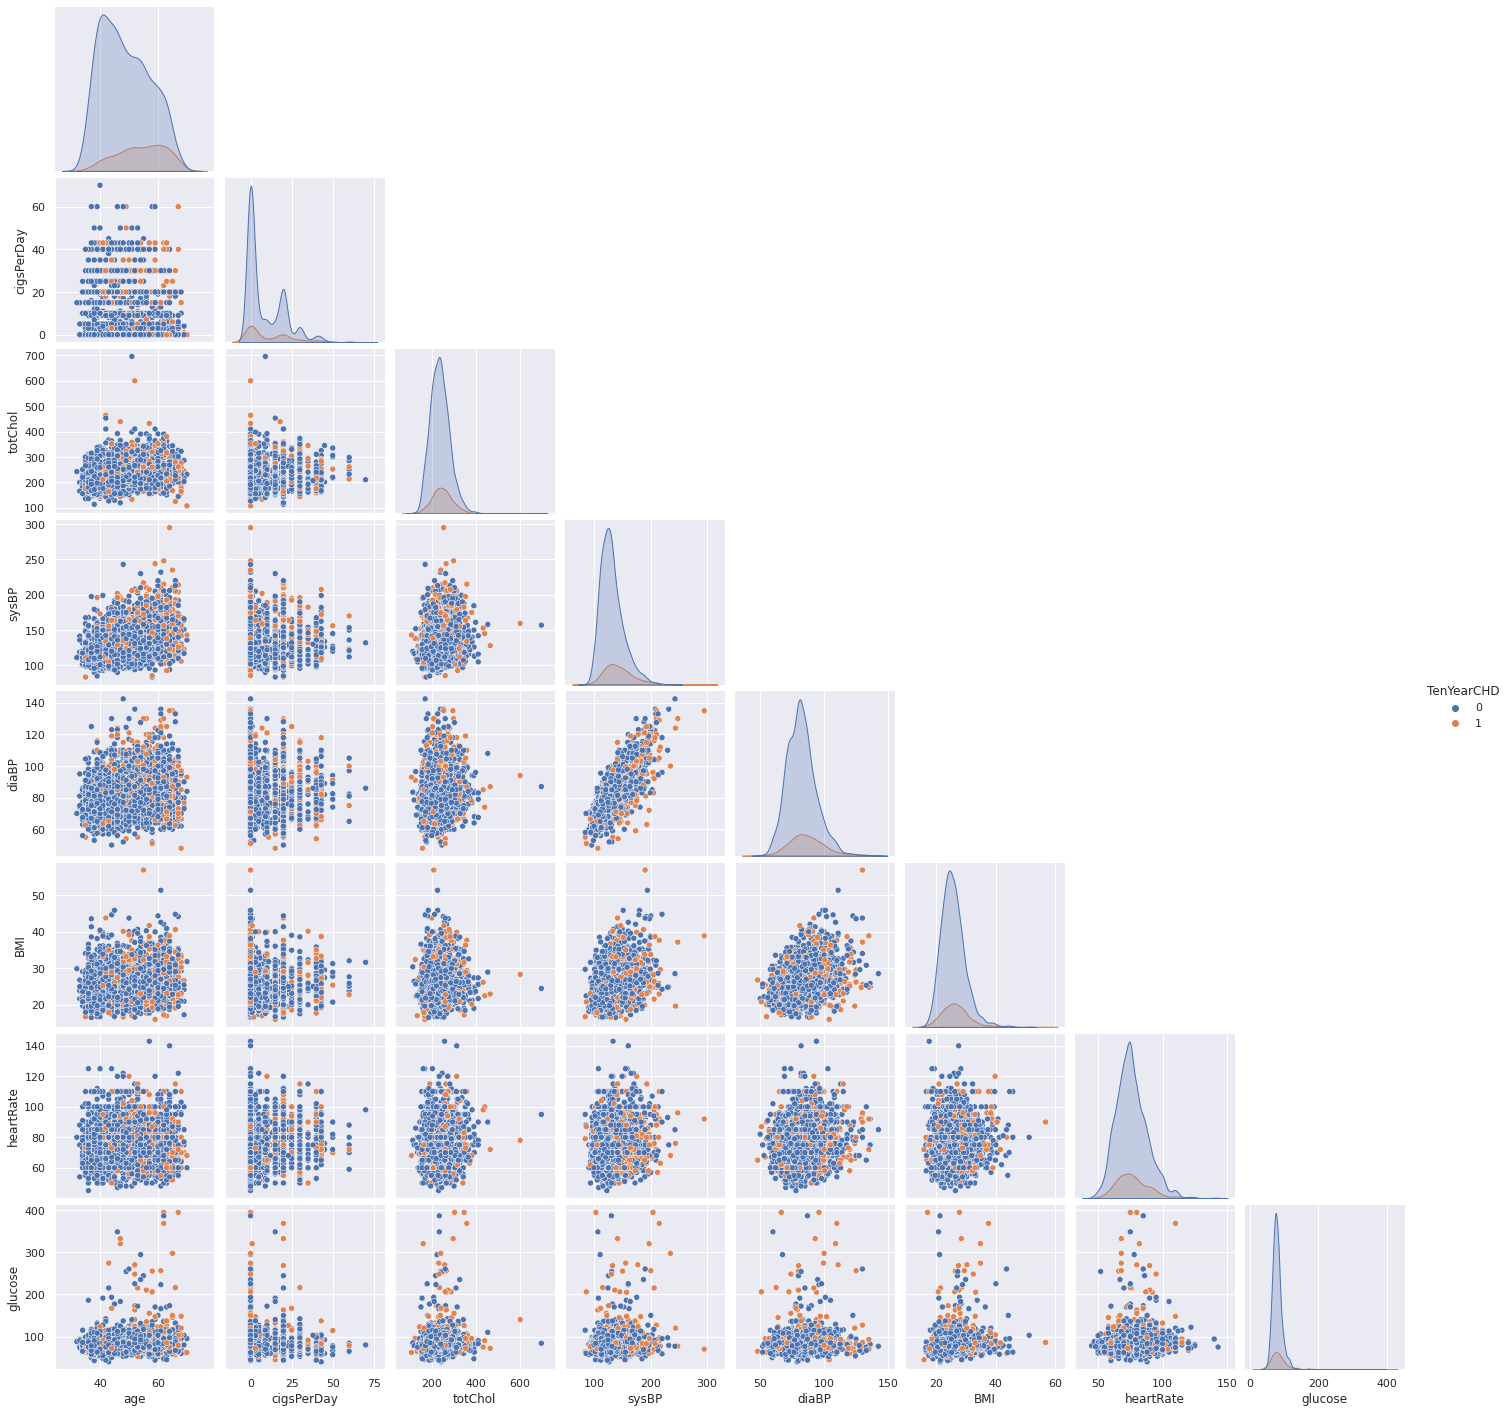

In [ ]:
# pairplot

sns.pairplot(data=df, vars=num_cols, hue=cat_cols[-1], corner=True)
plt.show()